<a href="https://colab.research.google.com/github/Roven777/Weather-data-classification/blob/main/Weather_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Data Classification
This project focuses on predicting the future level of humidity (at 3 PM) using historical weather data. By building a machine learning classification model, I aim to forecast whether the afternoon humidity will be above or below a certain threshold (25%). This binary classification can serve as a simplified yet effective approach to humidity forecasting.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/projects/weather data classification/daily_weather.csv')
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,Unnamed: 11
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,NaN
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597,NaN
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,NaN
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,NaN
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,NaN


## Dispersion plot

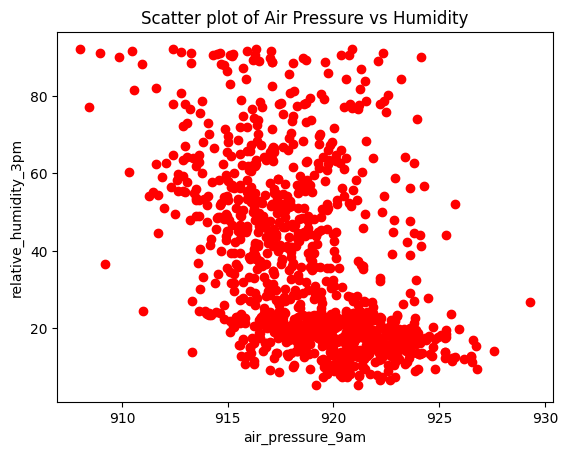

In [40]:
plt.scatter(df.air_pressure_9am,df.relative_humidity_3pm,color='red')
plt.xlabel("air_pressure_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Air Pressure vs Humidity")
plt.show()

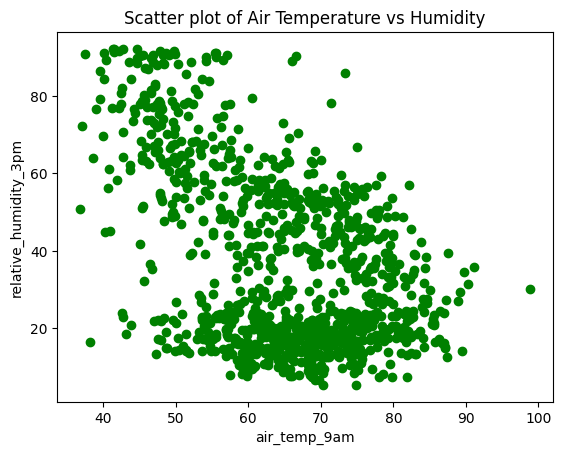

In [41]:
plt.scatter(df.air_temp_9am,df.relative_humidity_3pm,color='green')
plt.xlabel("air_temp_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Air Temperature vs Humidity")
plt.show()

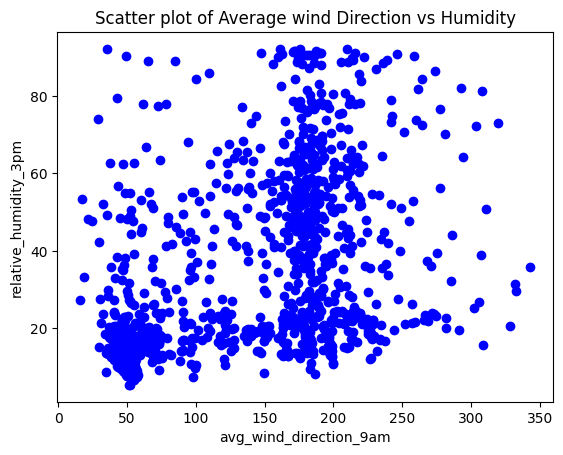

In [42]:
plt.scatter(df.avg_wind_direction_9am,df.relative_humidity_3pm,color='blue')
plt.xlabel("avg_wind_direction_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Average wind Direction vs Humidity")
plt.show()

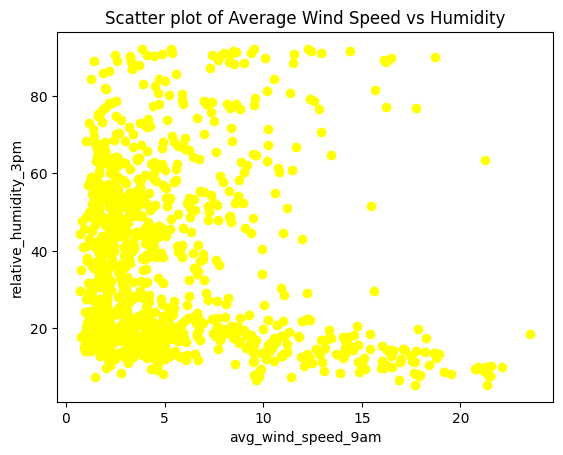

In [43]:
plt.scatter(df.avg_wind_speed_9am,df.relative_humidity_3pm,color='Yellow')
plt.xlabel("avg_wind_speed_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Average Wind Speed vs Humidity")
plt.show()

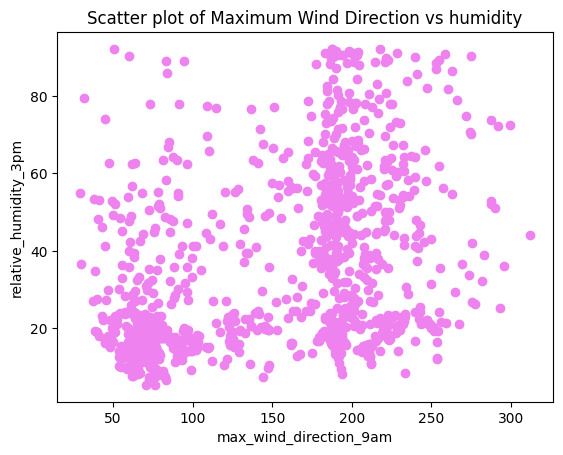

In [44]:
plt.scatter(df.max_wind_direction_9am,df.relative_humidity_3pm,color='violet')
plt.xlabel("max_wind_direction_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Maximum Wind Direction vs humidity")
plt.show()

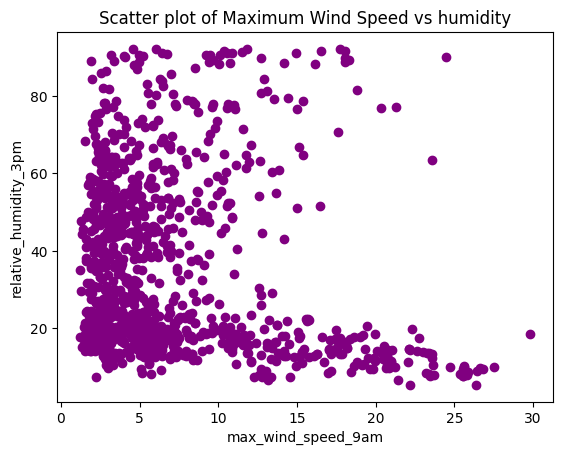

In [45]:
plt.scatter(df.max_wind_speed_9am,df.relative_humidity_3pm,color='purple')
plt.xlabel("max_wind_speed_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Maximum Wind Speed vs humidity")
plt.show()

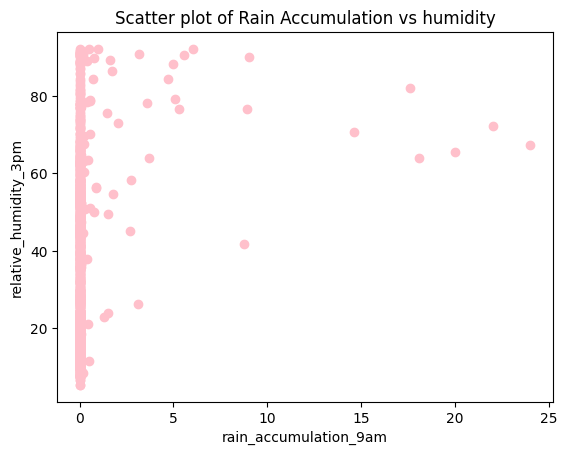

In [46]:
plt.scatter(df.rain_accumulation_9am,df.relative_humidity_3pm,color='pink')
plt.xlabel("rain_accumulation_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Rain Accumulation vs humidity")
plt.show()

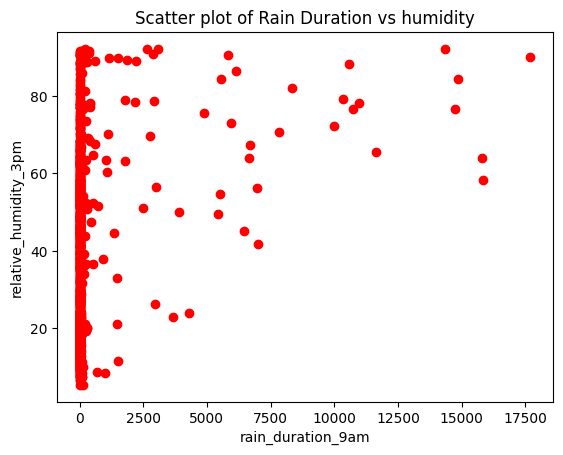

In [47]:
plt.scatter(df.rain_duration_9am,df.relative_humidity_3pm,color='red')
plt.xlabel("rain_duration_9am")
plt.ylabel("relative_humidity_3pm")
plt.title("Scatter plot of Rain Duration vs humidity")
plt.show()

## Central Tendency

In [48]:
print(df.describe())

            number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
count  1095.000000       1092.000000   1090.000000             1091.000000   
mean    547.000000        918.882551     64.933001              142.235511   
std     316.243577          3.184161     11.175514               69.137859   
min       0.000000        907.990000     36.752000               15.500000   
25%     273.500000        916.550000     57.281000               65.972506   
50%     547.000000        918.921045     65.715479              166.000000   
75%     820.500000        921.160073     73.450974              191.000000   
max    1094.000000        929.320000     98.906000              343.400000   

       avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
count         1092.000000             1092.000000         1091.000000   
mean             5.508284              148.953518            7.019514   
std              4.552813               67.238013            5.598209   
min  

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
 11  Unnamed: 11             0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 102.8 KB
None


In [50]:
# Check for null values
df.isnull().sum()

,0
number,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0


In [51]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [52]:
df.isnull().sum()

,0
number,0
air_pressure_9am,0
air_temp_9am,0
avg_wind_direction_9am,0
avg_wind_speed_9am,0
max_wind_direction_9am,0
max_wind_speed_9am,0
rain_accumulation_9am,0
rain_duration_9am,0
relative_humidity_9am,0


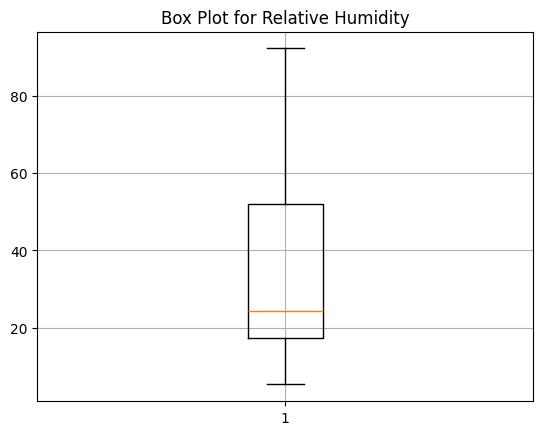

In [53]:
plt.boxplot(df["relative_humidity_3pm"])
plt.title("Box Plot for Relative Humidity")
plt.grid()
plt.show()

## Data Preprocessing

In [54]:
# Classify the values in the final column(y)(I.e. relative humidity at 3pm to be ‘0’ if the value is below 25 and ‘ 1’ if it is above 25)

df['humidity_class'] = df['relative_humidity_3pm'].apply(lambda x: 1 if x > 25 else 0)

In [55]:
df

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,Unnamed: 11,humidity_class
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,NaN,1
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597,NaN,0
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,NaN,0
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,NaN,0
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000,NaN,1
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000,NaN,1
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000,NaN,1
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000,NaN,1


In [56]:
df['humidity_class']

,humidity_class
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


## Spilt the test and train of X and Y
For train and testing the model

In [57]:
from sklearn.model_selection import train_test_split
y=df["humidity_class"] # target
x=df.drop(columns=["relative_humidity_3pm","humidity_class","number","Unnamed: 11"])

# split dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
x

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000
...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000


## Model Classification

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#create Decision Tree model
dt_model=DecisionTreeClassifier()

#train the model
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)


#evalute the model
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy using accuracy_score: {accuracy:.2f}")

print("Accuracy of the model with train dataset",dt_model.score(x_train,y_train))
dt_model.score(x_test,y_test)

accuracy using accuracy_score: 0.86
Accuracy of the model with train dataset 1.0


0.8584474885844748

In [60]:
print(len(x_test),len(y_test),len(y_pred))

219 219 219


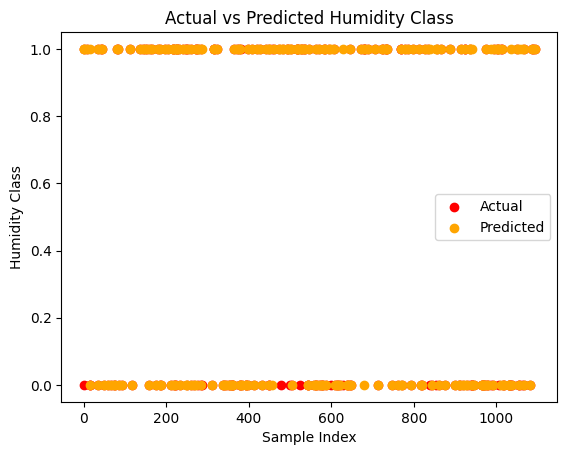

In [61]:
plt.scatter(x_test.index, y_test, color="Red", label="Actual")
plt.scatter(x_test.index, y_pred, color="orange", label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Humidity Class")
plt.xlabel("Sample Index")
plt.ylabel("Humidity Class")
plt.show()

In [62]:

#evalute the model
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy using accuracy_score: {accuracy:.2f}")

print("Accuracy of training dataset",dt_model.score(x_train,y_train))
dt_model.score(x_test,y_test)

accuracy using accuracy_score: 0.86
Accuracy of training dataset 1.0


0.8584474885844748

## Conclusion
From the above I can conclude that
- I trained my model with x_train and y_train parameters and I got the score of training dataset as above
- with the testing parameters I got score of testing dataset as above

NOTE:
- I have trained my model with all the catagorical data like
  - x=air_pressure_9am, air_temp_9am, avg_wind_direction_9am, avg_wind_speed_9am, max_wind_direction_9am, max_wind_speed_9am, rain_accumulation_9am, rain_duration_9am, relative_humidity_9am
  - y=only humidity class

## Future prediction

In [63]:
new_sample=[[920,65,190,4,205,5,0,0,26]]
future_predict=dt_model.predict(new_sample)

print("Future predict of my new sample: ",future_predict)

Future predict of my new sample:  [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


This 1 means the relative humidity at 3pm predicted by my model is greater than 25

After running the cell above and following the instructions to authorize Colab to access your Drive, you can then read the CSV file using the path to your file in Drive. Replace `'path/to/your/daily_weather.csv'` with the actual path to your file in Google Drive.